Import packages and functions

In [6]:
import sys
import os
sys.path.append('../')

In [7]:
from nustar_scripts.nu_pyxspec import  Model, Fit, Plot, xspec, AllModels
from nustar_scripts.nu_utils import set_mpl, plt
from nustar_scripts.pulsar_init import analysis_path, plot_path, ObsAlias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
set_mpl('husl')

AllModels.lmod('relxill', '/Users/sdbykov/work/xray_pulsars/sj0243_nu/python_for_nustar/relxill_model/') #set path to relxill model


# Spectral ratio to  power-law model

Define a function which plots the ratio of the phase-averaged spectra to the simple power law model.

In [8]:
def plot_po_rat(
    ObsID: str,
    ax: plt.Axes,
    gamma: str = '2',):
    """
    plot_po_rat plots the ration of the spectral data to the power law model

    Args:
        ObsID (str): OobsID of the observation
        ax (plt.Axes): axis to plot ratio on
        gamma (str): gamma of the power law model

    """

    ms, alpha, lw = 5, 0.7, 0
    min_sig = 300
    
    

    os.chdir(f"{analysis_path}out{ObsID}/products/spe_and_lc")
    xspec.AllData.clear()
    xspec.AllModels.clear()
    xspec.Xset.restore(f'./xspec/relxilllp/xcm/{ObsID}_relxilllp.xcm_data')
    mo_cutoffpl = Model("const*po")
    mo_cutoffpl.powerlaw.PhoIndex = str(gamma) + ' -1'

    mo_cutoffpl.setPars({1: '1. -1'})
    m2 = AllModels(2)
    m2.setPars({1: '1. '})
    Fit.query = 'yes'
    Fit.statMethod = "chi"
    Fit.query = "yes"
    Fit.perform()

    label = f'{ObsAlias[ObsID]}'

    for gr, m, l in zip([1], ['o'], [label]):

        Plot.device = "/null"
        Plot.setRebin(min_sig, min_sig)
        Plot("rat")
        Plot.xAxis = "keV"
        en = np.array(Plot.x(gr))
        data = np.array(Plot.y(gr))
        en_err = np.array(Plot.xErr(gr))
        data_err = np.array(Plot.yErr(gr))


        ax.semilogx(en, data, marker = m, lw = lw, alpha = alpha, ms = ms, label  =l)   
        color =  ax.get_lines()[-1].get_color()         
        ax.errorbar(en, data, data_err, en_err,
                        fmt='none', ecolor=color, alpha=alpha,)

    ax.set_xscale("log")
    ax.set_xlabel("Energy (keV)")

    ax.set_ylabel(f"Ratio to po,\n $\Gamma$={gamma}", fontsize = 14)
    ax.legend()
    ax.set_xticks([4, 6, 7, 10, 20, 40, 80])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())



    return fig, ax



Make a figure and run the function

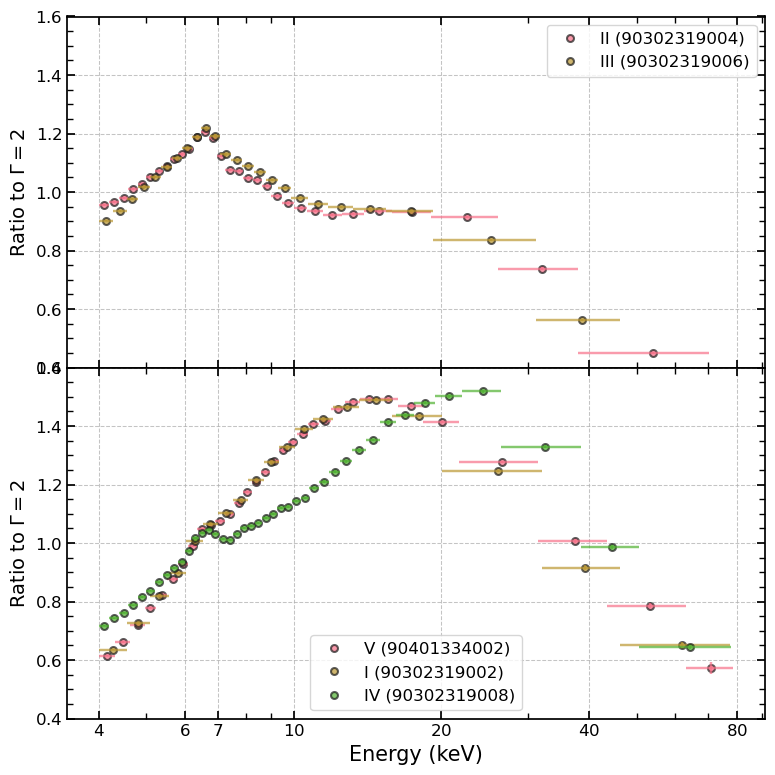

In [9]:
fig,  [ax1, ax2] =  plt.subplots(2, figsize = (8,8), sharex=True, gridspec_kw = {'hspace':0})
plot_po_rat('90302319004',  ax = ax1)
plot_po_rat('90302319006', ax = ax1)

plot_po_rat('90401334002',  ax = ax2)
plot_po_rat('90302319002',  ax = ax2)
plot_po_rat('90302319008', ax = ax2)

ax1.set_ylabel(f"Ratio to $\Gamma=2$", fontsize = 14)
ax2.set_ylabel(f"Ratio to $\Gamma=2$", fontsize = 14)
ax2.set_ylim(0.4,1.6)
ax1.set_ylim(0.4,1.6)
fig.tight_layout()
fig.savefig(plot_path+ '/ph-ave/cutoffpl_ratio_ph_ave.pdf')